<a href="https://colab.research.google.com/github/MrJulianGeo/ML_SpaceShips/blob/main/SpaceJM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objs as go


from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc,roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
import lightgbm as lgb


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datacamp/pynb/TrainExamplesML/SpaceShips/train.csv')
test_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datacamp/pynb/TrainExamplesML/SpaceShips/test.csv')
print('Train set shape:', train_data.shape)
print('Test set shape:', test_data.shape)

Train set shape: (8693, 14)
Test set shape: (4277, 13)


In [ ]:
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
train_data.isnull().sum()


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
train_data.describe(include='all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


We will split "Cabin" column into 3 columns and take the "Deck" and "Side" columns.
We will drop the meaningless columns

In [ ]:
train_data[["Deck","num","side"]] = train_data["Cabin"].str.split(pat='/', expand=True)
train_data.drop(["num","Cabin"], axis=1, inplace=True)

We will just take the "Group member count" from the "PassengerId" column and calculate the frequency of each Group member count and put in the "Group_count" column.

In [ ]:
train_data

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,P
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,S
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,S
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,S


In [ ]:
train_data["PassengerId"] = train_data["PassengerId"].str.split("_",expand=True).iloc[:,0]
group_count = train_data["PassengerId"].value_counts().sort_values(ascending=False)
train_data["Group_count"] = train_data["PassengerId"].replace(group_count)
train_data["PassengerId"].head(5)

0    0001
1    0002
2    0003
3    0003
4    0004
Name: PassengerId, dtype: object

In [ ]:
group_count = train_data["PassengerId"].value_counts().sort_values(ascending=False)
train_data["Group_count"] = train_data["PassengerId"].replace(group_count)
train_data.drop(["PassengerId"], axis=1, inplace=True)
train_data["Group_count"].sample(5)

755     1
339     7
5695    3
4349    5
1016    1
Name: Group_count, dtype: int64

In [ ]:
train_data.isnull().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
Deck            199
side            199
Group_count       0
dtype: int64

We will just take the surname and calculate the frequency of each surname and replace the frequency with the surname.

In [ ]:
train_data["Surname"] = train_data["Name"].str.split(pat=' ', expand=True)[1]
train_data.drop(["Name"], axis=1, inplace=True)
train_data["Surname"].value_counts().sort_values(ascending=False)

surname_val_count = train_data["Surname"].value_counts().sort_values(ascending=False)
train_data["Surname"] = train_data["Surname"].replace(surname_val_count)
train_data[["Surname","Transported","Group_count"]] = train_data[["Surname","Transported","Group_count"]].astype('object')

Distribution Of Categorical Values ¶


In [ ]:
obj_col = train_data.select_dtypes(include='object').columns.tolist()

fig = make_subplots(rows=3, cols=4,specs=[[dict(type="domain")]*4]*3,horizontal_spacing=0.01,vertical_spacing=0.01)

for i,col in enumerate(obj_col):
    row, col_num = i//3, i%3

    val_counts = train_data[col].value_counts()

    x = val_counts.index.tolist()
    y = val_counts.values.tolist()

    pie = go.Pie(labels=x,values=y,hole=0.6,hoverinfo="label+percent",showlegend=False,textinfo='label+percent',textposition='inside',textfont=dict(family='Arial',size=10,color='black'),title=col)

    fig.add_trace(pie,row=row+1,col=col_num+1)
    fig.update_layout(
        paper_bgcolor='LightSteelBlue',
        title_text="Distribution Of Categorical Values",
        title_x=0.42,
        title_y = 0.97,
        title_font=dict(family='Arial',size=32,color='black'),
        width=1280,height=720,margin=dict(t=80,l=100,r=10,b=10),
    )
fig.show()


Age Distribution By Transported ¶

---



<ipython-input-17-ead7b059a8b0>:3: UserWarning:

The palette list has more values (6) than needed (2), which may not be intended.



Text(0.5, 1.0, 'Age Distribution By Transported')

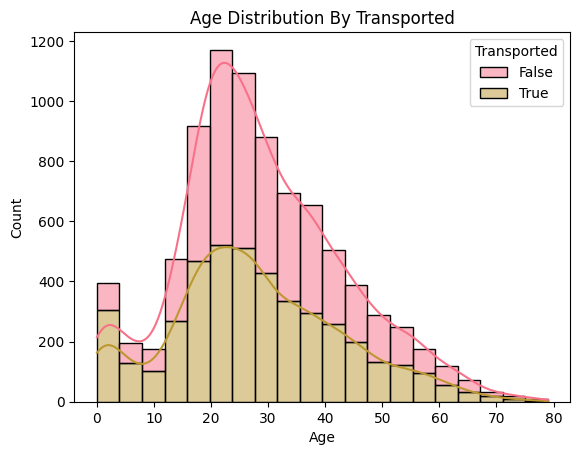

In [ ]:
color = sns.color_palette("husl", as_cmap=False)

plot = sns.histplot(data=train_data,x="Age",hue="Transported",multiple="stack",kde=True,bins=20,label="Age",palette=color)

plot.set_title("Age Distribution By Transported")

Corralation Matrix ¶


<Axes: >

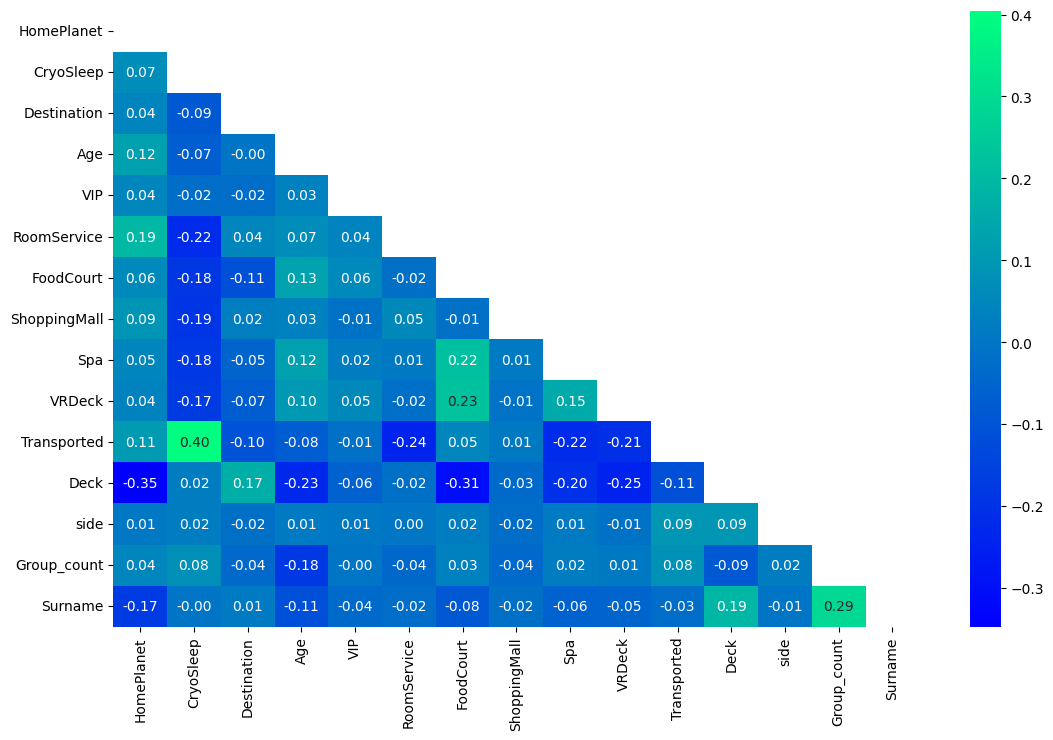

In [ ]:
obj_col = train_data.select_dtypes(include='object').columns.tolist()

corr_new_df = train_data.copy()


le = { col: LabelEncoder() for col in obj_col}

for col in obj_col:
    corr_new_df[col] = le[col].fit_transform(corr_new_df[col])

plt.figure(figsize=(13,8))
corr = corr_new_df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(corr)]=True

sns.heatmap(corr, annot=True, fmt='.2f', cmap='winter',mask=mask)

In [ ]:
X = data.drop('priceRange',axis=1)
y = data['priceRange']

print(X.shape, y.shape)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

features_importance = rf.feature_importances_

features_importance_df = pd.DataFrame({ 'Feature': X_train.columns,
                                       'Importance': features_importance})

features_importance_df = features_importance_df.sort_values(by='Importance', ascending=False)

ValueError: Cannot cast object dtype to float32

Spider Chart Of Expenditures ¶


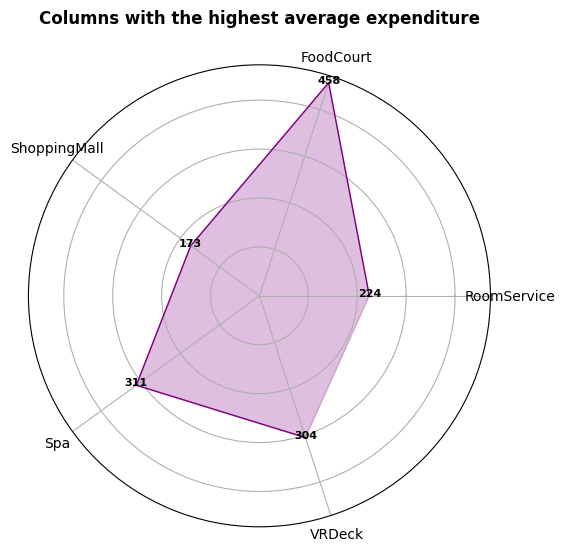

In [ ]:
expen_col = train_data.select_dtypes(include='number').drop("Age",axis=1).columns.tolist()

angles = np.linspace(0,2*np.pi,len(expen_col),endpoint=False).tolist()
values = train_data[expen_col].mean().tolist()


fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='purple', alpha=0.25)
ax.plot(angles, values, color='purple', linewidth=1)

angles += angles[:1]

for j, angle in enumerate(angles[:-1]):
    ax.annotate(int(values[j]), xy=(angle, values[j]), xytext=(angle, values[j] + 0.1),
                ha='center', fontsize=8, color='black',fontweight='bold')

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(expen_col)

plt.title('Columns with the highest average expenditure',pad=30,fontweight='bold')



plt.show()

Graph Of NaN Values İn Each Row ¶


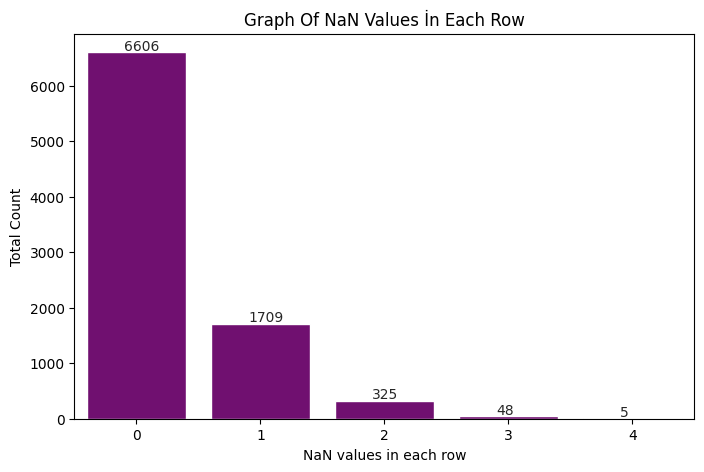

In [ ]:
df_nul_val_in_row = pd.DataFrame(train_data.isnull().sum(axis=1).value_counts().sort_values(ascending=False))

fig,ax = plt.subplots(figsize=(8,5),nrows=1,ncols=1)
sns.set_style("ticks")

x = df_nul_val_in_row.index
y = df_nul_val_in_row.values.reshape(1,len(df_nul_val_in_row))[0]

sns_bar = sns.barplot(x=x,y=y,width=0.8,color='purple')
plt.ylabel("Total Count")
plt.xlabel("NaN values in each row")
ax.set_title('Graph Of NaN Values İn Each Row')
for i in sns_bar.patches:
    sns_bar.annotate(f"{int(i.get_height())}",xy=(i.get_x()+i.get_width()/2 - 0.1,i.get_height()+40))

In [ ]:
train_data[["Surname","Group_count"]] = train_data[["Surname","Group_count"]].astype(np.float64)

Train Test Split ¶


In [ ]:
# city - City where the property is located
# homeType - Property type

for col in list(train_data.columns):
  print(col, len(train_data[col].unique()), train_data[col].unique(), '\n')

HomePlanet 4 ['Europa' 'Earth' 'Mars' nan] 

CryoSleep 3 [False True nan] 

Destination 4 ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan] 

Age 81 [39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 nan 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61.
 50. 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71.
 75. 70. 76. 78. 73. 66. 69. 72. 77.] 

VIP 3 [False True nan] 

RoomService 1274 [   0.  109.   43. ... 1569. 8586.  745.] 

FoodCourt 1508 [   0.    9. 3576. ... 3208. 6819. 4688.] 

ShoppingMall 1116 [   0.   25.  371. ... 1085.  510. 1872.] 

Spa 1328 [   0.  549. 6715. ... 2868. 1107. 1643.] 

VRDeck 1307 [   0.   44.   49. ... 1164.  971. 3235.] 

Transported 2 [False True] 

Deck 9 ['B' 'F' 'A' 'G' nan 'E' 'D' 'C' 'T'] 

side 3 ['P' 'S' nan] 

Group_count 8 [1. 2. 3. 6. 4. 7. 5. 8.] 

Surname 18 [ 1.  4.  6.  7.  5.  3. nan  2. 10.  8.  9. 11. 16

In [ ]:
# Columns with missing values
na_cols=train_data.columns[train_data.isna().any()].tolist()

# Missing values summary
mv=pd.DataFrame(train_data[na_cols].isna().sum(), columns=['Number_missing'])
mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(train_data),2)
mv

,Number_missing,Percentage_missing
HomePlanet,201,2.31
CryoSleep,217,2.50
Destination,182,2.09
Age,179,2.06
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11
ShoppingMall,208,2.39
Spa,183,2.11
VRDeck,188,2.16


In [ ]:
train_data=train_data.dropna()
train_data

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,side,Group_count,Surname
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P,1.0,1.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S,1.0,4.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S,2.0,6.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S,2.0,6.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,P,1.0,3.0
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,S,1.0,2.0
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,S,1.0,6.0
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,S,2.0,6.0


In [ ]:
# Columns with missing values
na_cols=train_data.columns[train_data.isna().any()].tolist()

# Missing values summary
mv=pd.DataFrame(train_data[na_cols].isna().sum(), columns=['Number_missing'])
mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(train_data),2)
mv

,Number_missing,Percentage_missing


In [ ]:
# Convert categorical variables to numerical representations
csv = pd.get_dummies(data_train, columns=['HomePlanet', 'Name'], drop_first=True)
csv.head()

In [ ]:
X = train_data.drop('Transported',axis=1)
y = train_data['Transported']

print(X.shape, y.shape)

(8693, 14) (8693,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.1)

In [ ]:
X_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,side,Group_count,Surname
754,Earth,True,PSO J318.5-22,24.0,False,0.0,0.0,0.0,0.0,0.0,G,P,1.0,2.0
5263,Earth,True,55 Cancri e,20.0,False,0.0,0.0,0.0,0.0,0.0,G,S,1.0,9.0
7027,Earth,False,55 Cancri e,25.0,False,0.0,1435.0,0.0,0.0,0.0,G,P,1.0,5.0
4410,Mars,NaN,TRAPPIST-1e,19.0,False,0.0,0.0,0.0,0.0,0.0,F,P,4.0,NaN
7054,Earth,False,55 Cancri e,4.0,False,0.0,0.0,0.0,0.0,0.0,E,S,3.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,Europa,True,TRAPPIST-1e,19.0,False,0.0,0.0,0.0,0.0,0.0,B,S,3.0,4.0
369,Earth,False,TRAPPIST-1e,20.0,False,0.0,465.0,0.0,5.0,223.0,F,P,3.0,6.0
2682,Earth,False,PSO J318.5-22,57.0,False,0.0,1431.0,0.0,30.0,337.0,G,S,1.0,4.0
4668,Earth,False,TRAPPIST-1e,46.0,False,0.0,4.0,834.0,0.0,32.0,F,S,2.0,7.0


In [ ]:
y_train

array([1, 1, 1, ..., 0, 1, 0])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

features_importance = rf.feature_importances_

features_importance_df = pd.DataFrame({ 'Feature': X_train.columns,
                                       'Importance': features_importance})

features_importance_df = features_importance_df.sort_values(by='Importance', ascending=False)

ValueError: could not convert string to float: 'Earth'

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

models = {
    'RandomForest':RandomForestClassifier(),
    'SVC':SVC(),
    'GradientBoosting':GradientBoostingClassifier()
}
print(models)

kfold = KFold(n_splits=5,shuffle=True)

model_performance = {}
for name, model in models.items():
  cv_score = cross_val_score(model, X_train, y_train,cv=kfold, scoring='accuracy')
  model_performance[name] = cv_score
  print(name, cv_score, np.mean(cv_score))


{'RandomForest': RandomForestClassifier(), 'SVC': SVC(), 'GradientBoosting': GradientBoostingClassifier()}


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/categorical.py", line 533, in astype
    new_cats = new_cats.astype(dtype=dtype, copy=copy)
ValueError: could not convert string to float: 'A'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 345, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 810, in check_array
    array = array.astype(new_dtype)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 6324, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/managers.py", line 451, in astype
    return self.apply(
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/managers.py", line 352, in apply
    applied = getattr(b, f)(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py", line 511, in astype
    new_values = astype_array_safe(values, dtype, copy=copy, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py", line 242, in astype_array_safe
    new_values = astype_array(values, dtype, copy=copy)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py", line 184, in astype_array
    values = values.astype(dtype, copy=copy)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/categorical.py", line 544, in astype
    raise ValueError(msg)
ValueError: Cannot cast object dtype to float32


In [ ]:
let = LabelEncoder()
y = let.fit_transform(train_data["Transported"])
X = train_data.drop(["Transported"], axis=1)

last_cat = X.select_dtypes(include='object').columns.tolist()

X[last_cat] = X[last_cat].astype("category")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape,
      y_train.shape,
      X_test.shape,
      y_test.shape)

(6954, 14) (6954,) (1739, 14) (1739,)


Search Best Model Parameters ¶


In [ ]:
param_grid = {
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.1, 0.01, 0.005],
    'n_estimators': [100, 200, 500],
    'max_bin': [255, 512],
    'min_data_in_leaf': [20, 40, 60]
}


model = lgb.LGBMClassifier(objective='binary', metric='auc', categorical_feature=last_cat)


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy',verbose=0)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_


y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1873: UserWarning:

categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.

/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1893: UserWarning:

categorical_feature in param dict is overridden.



[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] categorical_feature is set=HomePlanet,CryoSleep,Destination,VIP,Deck,side, categorical_column=0,1,2,4,10,11 will be ignored. Current value: categorical_feature=HomePlanet,CryoSleep,Destination,VIP,Deck,side
[LightGBM] [Info] Number of positive: 3500, number of negative: 3454
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001302 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2693
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503307 -> initscore=0.013230
[LightGBM] [Info] Start trai

In [ ]:
print("---------------------Best parameters ---------------------")
print(grid_search.best_params_)

---------------------Best parameters ---------------------
{'learning_rate': 0.01, 'max_bin': 512, 'min_data_in_leaf': 40, 'n_estimators': 500, 'num_leaves': 31}


**Nuevo**


Model Evaluation ¶


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Test Accuracy: {accuracy}")
print(f"Test ROC AUC: {roc_auc}")

Test Accuracy: 0.8021851638872916
Test ROC AUC: 0.8846629045528983


Text(0.5, 1.0, 'Test Accuracy: 0.8')

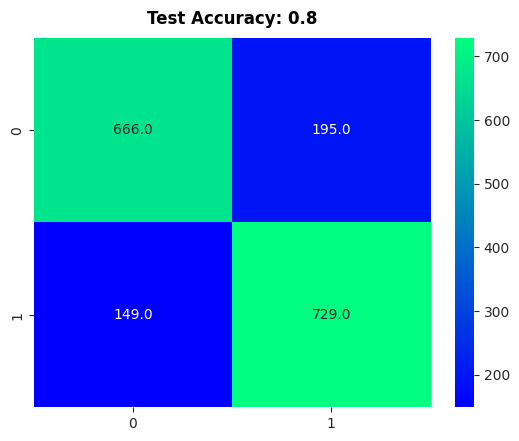

In [ ]:
conf = confusion_matrix(y_test,y_pred)
sns.heatmap(conf,annot=True,fmt=".1f",cmap="winter")
plt.title(f"Test Accuracy: {round(accuracy,2)}",fontweight='bold',fontsize='large',color='black',pad=10)

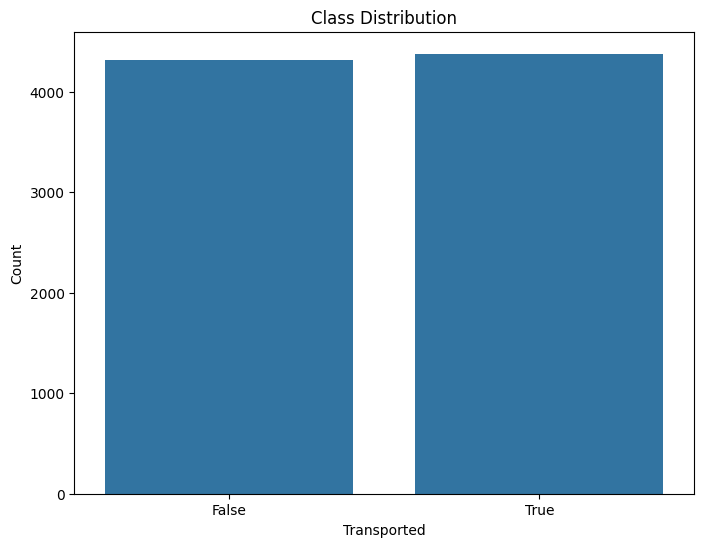

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train_data, x='Transported')
plt.title('Class Distribution')
plt.xlabel('Transported')
plt.ylabel('Count')
plt.show()

In [ ]:
train_data['Title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_data['Title'] = test_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

KeyError: 'Name'

In [ ]:
train_data['Title']

Separar objetivo a predecir

In [ ]:
y = train_data['Transported']
X = train_data.drop(['Transported'], axis=1)

In [ ]:
X = X.drop(['PassengerId', 'Name', 'Cabin'], axis=1)

In [ ]:
numeric_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Title']

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [ ]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train_upsampled, y_train_upsampled = resample(X_train[y_train == 1], y_train[y_train == 1],
                                                replace=True, n_samples=X_train[y_train == 0].shape[0],
                                                random_state=42)
X_train_upsampled = pd.concat([X_train[y_train == 0], X_train_upsampled])
y_train_upsampled = pd.concat([y_train[y_train == 0], y_train_upsampled])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [ ]:
pipeline.fit(X_train_upsampled, y_train_upsampled)

In [ ]:
y_pred = pipeline.predict(X_val)

In [ ]:
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
if hasattr(pipeline['classifier'], 'feature_importances_'):
    feature_importance = pipeline['classifier'].feature_importances_
    sorted_idx = np.argsort(feature_importance)

    # Get the top features and their importances
    top_features = X_train.columns[sorted_idx[-10:]]  # Select the top 10 features
    top_importance = feature_importance[sorted_idx][-10:]  # Corresponding importances

    # Plot the feature importance with different colors for each feature
    colors = plt.cm.viridis(np.linspace(0, 1, len(top_features)))
    plt.figure(figsize=(10, 8))
    for i, (feature, importance, color) in enumerate(zip(top_features, top_importance, colors)):
        plt.barh(feature, importance, color=color, label=f'{feature} Importance')

    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance')
    plt.legend()
    plt.show()

In [ ]:
if hasattr(pipeline['classifier'], 'predict_proba'):
    fpr, tpr, _ = roc_curve(y_val, pipeline.predict_proba(X_val)[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
# Plotting Actual Data vs. Predicted Data
plt.figure(figsize=(10, 6))

# Plot actual data
plt.plot(y_val.values, label='Actual', color='blue')

# Plot predicted data
plt.plot(y_pred, label='Predicted', color='orange')

plt.title('Actual vs. Predicted Data')
plt.xlabel('Sample')
plt.ylabel('Transported')
plt.legend()
plt.show()

In [ ]:
test_predictions = pipeline.predict(test_data.drop(['PassengerId', 'Name', 'Cabin'], axis=1))
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Transported': test_predictions
})
submission.to_csv('submission.csv', index=False)
print("Submission file has been created and saved as 'submission.csv'")

In [ ]:
submission=pd.read_csv('/content/submission.csv')
print('submission:', submission)

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=submission, x='Transported')
plt.title('Class Distribution')
plt.xlabel('Transported')
plt.ylabel('Count')
plt.show()